## 선형회귀를 훈련시키는 두가지 방법
1. 경사하강법(GD)이라 불리는 반복적인 최적화 방식을 사용해서 파라미터를 조금씩 바꾼다.
2. 직접 계산할 수 있는 공식을 사용하여 훈련세트에 가장 잘맞는 파라미터를 해석적으로 구한다.

모델을 훈련시킨다는 의미? 모델이 훈련세트에 들어맞도록 파라미터를 설정하는 일

### 4.1.1 정규방정식

비용함수를 최소화하는 값을 찾는 해석적인 방법



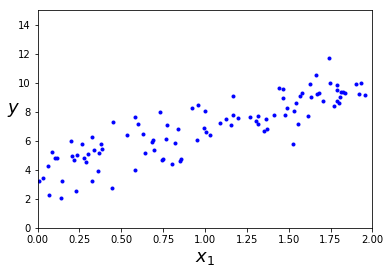

In [3]:
## 100개의 변수 생성
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)  ## 100X1의 의 배열로 무작위 숫자를 생성
y = 4 + 3 * X+np.random.randn(100,1) ## 약간의 노이즈를 섞은 일차함수
## rand는 rand 명령은 0부터 1사이에서 균일한 확률 분포로 실수 난수를 생성
## randn은 정규확률분포(Standard normal distribution)를 따르는 난수를 생성

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
x_b = np.c_[np.ones((100,1)),X] ## 모든 샘플에 X0 = 1을 추가함
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) ## 정규방정식 코드구현
theta_best # 노이즈 때문에 (4, 3)이 나오지는 않았다.

array([[3.79853527],
       [3.07693619]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] ## 모든 샘플에 x0 = 1을 추가함
y_predict =  X_new_b.dot(theta_best) ## 훈련된 θ로 y를 예측하자
y_predict

array([[3.79853527],
       [9.95240765]])

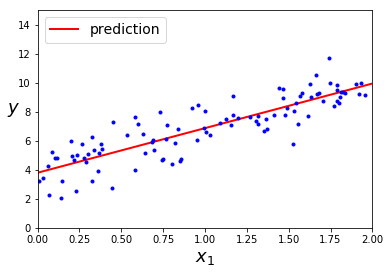

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label='prediction')
## 예측된 두개의 점을 빨간색 선으로 잇는다, 선의 굵기는 2, 범례는 'prediction'
plt.plot(X, y, "b.") ## X와 y에 해당 되는 점에 파란색 점을 찍음
plt.xlabel("$x_1$", fontsize=18) ## x축 밑에 이름은 x1으로 하고 size는 18
plt.ylabel("$y$", rotation=0, fontsize=18)
## y축 왼쪽에 이름은 y로 하고 회전시키지 말고 글자크기는 18
plt.legend(loc="upper left", fontsize=14) ## prediction의 위치를 왼쪽 위로 하고 크기는 14
plt.axis([0, 2, 0, 15]) ## x축의 크기를 0에서2 , y축의 크기는 0에서 15
plt.show()

### 4.2 경사하강법(Gradient Descent)

특성이 매우 많고 훈련 샘플이 너무 많을 때 사용하기 적합
어떤 비용함수에서 그 파라미터를 계속 조정해서 최적의 파라미터를 찾는 방법
경사 하강법의 중요한 파라미터는 학습률(Learning late)
경사 하강법을 사용할 때는 특성들의 스케일이 같도록 만들어줘야 한다


### 4.2.1 배치 경사 하강법

매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산
이러한 이유로 매우 큰 훈련세트에서는 아주 느리다.
하지만 특성 수에 대해서는 민감하지 않다.
최적의 학습률은 그리드 탐색을 통해서 찾는다.

In [9]:
eta = 0.1 # 학습률
n_iterations = 1000 ## 반복 횟수
m = 100
theta = np.random.randn(2,1) ## 정규분포 확률로 난수를 골라 2X1행렬에 넣음
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y) ## 그래디언트 벡터를 구함
    theta = theta - eta * gradients ## 새로운 theta(파라미터)에 대입

theta

array([[3.79853527],
       [3.07693619]])

###  4.2.2 확률적 경사 하강법(Stochastic Gradient Descent)

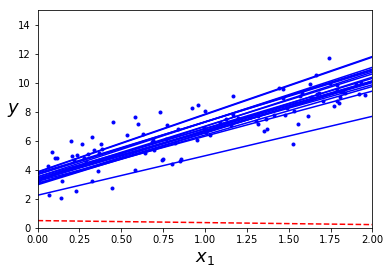

In [10]:
theta_path_sgd = []
m = len(x_b) # 100
np.random.seed(42)

n_epochs = 50 ## 한 반복에서 m번 되풀이 되는데, 이 때 한 번의 반복을 epoch라 한다.
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터(매 반복에서 학습률을 결정하는 파라미터)
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20 :         #첫 반복의 20까지 #책에는 빠짐
            y_predict = X_new_b.dot(theta)# 0과 2의 예측값 #책에는 빠짐
            style = "b-" if i > 0 else "r--" # 0이 아닐 때는 파란 실선 0일 때는 빨간 점선 # 책에는 빠짐
            plt.plot(X_new, y_predict, style)# 그래프를 그려라 # 책에는 빠짐
        random_index = np.random.randint(m) ## 0부터 99사이의 값 중 하나를 랜덤으로 선택
        xi = x_b[random_index:random_index+1] ## 데이터 중 하나의 샘플을 선택
        yi = y[random_index:random_index+1] ## 선택한 샘플 데이터의 타겟값 선택
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) ## 하나의 샘플로만 그래디언트 계산
        eta = learning_schedule(epoch * m + i) ## epoc와 i가 감소 할 때마다 학습률 감소
        theta = theta - eta * gradients ## 새로운 세타를 대입
        theta_path_sgd.append(theta)    ## 리스트에 튜닝돼서 나오는 theta다 넣음             # 책에는 빠짐
        
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                                              
plt.show()  

### 4.2.3 미니 배치 경사 하강법(Mini-batch Gradient Descent)

임의의 작은 샘플 세트에 대해 그래디언트를 계산하는 경사 하강법
확률적 경사 하강법보다 덜 불규칙하므로 최솟값에 더 가까이 도달
지역 최솟값에서 빠져나오기 힘들 수도 있습니다.
외부 메모리 학습이 가능합니다.

### 4.3 다항 회귀(Polynomial Regression)

비선형 데이터를 학습하는데 특성의 거듭제곱을 새로운 특성으로 추가하고 추가한 데이터셋에 선형 모델을 훈련시키는 기법입니다.



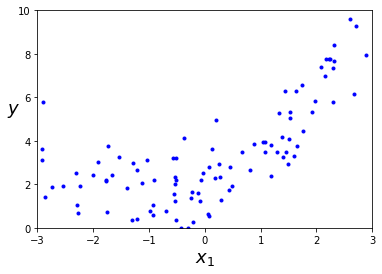

In [11]:
## 약간의 노이즈가 있는 2차 함수를 따르는 데이터셋 만들기
m = 100
X = 6 * np.random.rand(m, 1) - 3 ## -3부터 3 까지 랜덤하게
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  ##  y 값은 약간의 노이즈가 있는 2차 함수

## x,y를 그래프에 나타내면
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)  
## degree=2 이면 제곱값들을 특성으로 추가 default는 2, include_bias는 x0=1을 추가할지 말지 경정, default 는 True
X_poly = poly_features.fit_transform(X)
X_poly[0] ## X데이터의 특성에 제곱값이 추가 됨.

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# y절편은 2.09060416, x2의 계수는 1.00332088, x의 계수는 0.45237349

(array([2.00704064]), array([[1.04541031, 0.52314711]]))

### 4.4 학습 곡선(Learning Curve)

얼마나 복잡한 모델을 사용할지, 이 모델이 과대적합, 과소적합 되었는지 확인하는것

검증 오차란??